In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Iteration-4').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [2]:
df = spark.read.load('./student-mat.csv', inferSchema=True, format = 'csv', header = 'true')

In [3]:
df.show(5)
df.printSchema()
df.count()


+------+---+---+-------+-------+-------+----+----+-------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|   Mjob|    Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|
+------+---+---+-------+-------+-------+----+----+-------+--------+------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+
|    GP|  F| 18|      U|    GT3|      A|   4|   4|at_home| teacher|course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6|  6|
|    GP|  F| 17|      U|    GT3|      T|

395

In [4]:
df=df.withColumn('mean_grade',(df['G1']+df['G2']+df['G3'])/3)
df.show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

In [5]:
import matplotlib.pyplot as plt
dftap= df.toPandas()
fig, ax =plt.subplots()
ax.hist(dftap['mean_grade'])
ax.set_title('absences of grade')
ax.set_xlabel('mean_grade')
ax.set_ylabel('absences')

Text(0,0.5,'absences')

In [6]:

print(dftap.corr()['mean_grade'])

age          -0.134589
Medu          0.224260
Fedu          0.175852
traveltime   -0.128197
studytime     0.134565
failures     -0.375759
famrel        0.021653
freetime      0.003773
goout        -0.154511
Dalc         -0.072508
Walc         -0.088025
health       -0.080380
absences     -0.005909
G1            0.919386
G2            0.967999
G3            0.959873
mean_grade    1.000000
Name: mean_grade, dtype: float64


In [7]:
print(dftap.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [8]:
df.filter('G3>10').select('absences').show()

+--------+
|absences|
+--------+
|       2|
|      10|
|       0|
|       0|
|       0|
|       4|
|       2|
|       2|
|       0|
|       4|
|       6|
|       0|
|       0|
|       2|
|       0|
|       2|
|       4|
|       4|
|      16|
|       0|
+--------+
only showing top 20 rows



In [9]:
df.describe().show()

+-------+------+----+------------------+-------+-------+-------+------------------+------------------+-------+-------+----------+--------+------------------+------------------+------------------+---------+------+----+----------+-------+------+--------+--------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|school| sex|               age|address|famsize|Pstatus|              Medu|              Fedu|   Mjob|   Fjob|    reason|guardian|        traveltime|         studytime|          failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|            famrel|          freetime|             goout|              Dalc|              Walc|            health|         absences|                G1|                G2|                G3|        mean_grade|
+-------+------+----+------------------+-------+-------+----

In [10]:
df=df.na.drop()
df.count()
dftap=df.toPandas()
print(dftap.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [11]:
df.na.drop(subset='G3').show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

In [12]:
from pyspark.sql.functions import mean
mean_G3 = df.select(mean(df['G3'])).collect()
mean_G3
df.na.fill('10.4', subset=['G3']).show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

In [13]:
mean_G2 = df.select(mean(df['G2'])).collect()
mean_G2
df.na.fill('10.7', subset=['G2']).show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

In [14]:
mean_G1 = df.select(mean(df['G1'])).collect()
mean_G1
df.na.fill('10.9', subset=['G1']).show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

In [15]:
mean_absences = df.select(mean(df['absences'])).collect()
mean_absences
df.na.fill('6', subset=['absences']).show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|  

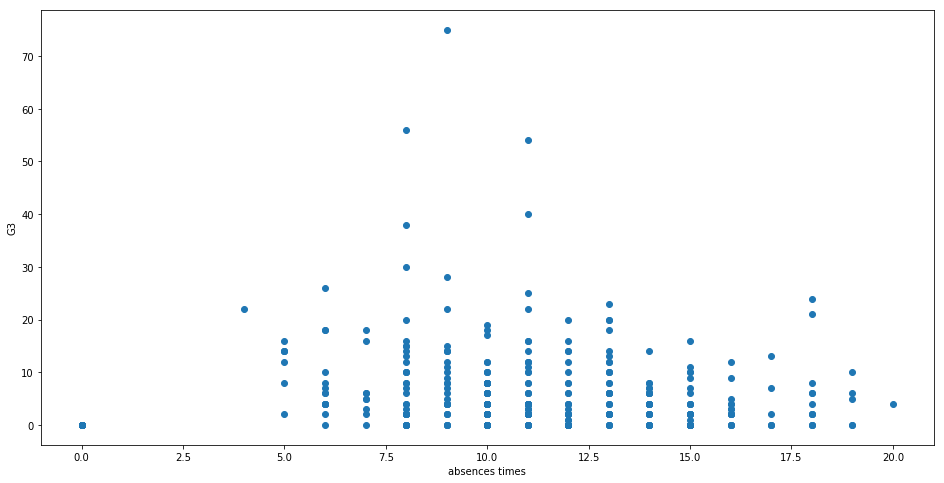

In [16]:
flt,ax=plt.subplots(figsize=(16,8))
ax.scatter(dftap['G3'],dftap['absences'])
ax.set_xlabel('absences times')
ax.set_ylabel('G3')
plt.show()

In [17]:
df1 = spark.read.load('./GP.csv', inferSchema=True, format = 'csv', header = 'true')
df2 = spark.read.load('./MS.csv', inferSchema=True, format = 'csv', header = 'true')

In [18]:
df1tap= df1.toPandas()
df2tap= df2.toPandas()
print(df1tap.info())
print(df2tap.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 33 columns):
school        349 non-null object
sex           349 non-null object
age           349 non-null int64
address       349 non-null object
famsize       349 non-null object
Pstatus       349 non-null object
Medu          349 non-null int64
Fedu          349 non-null int64
Mjob          349 non-null object
Fjob          349 non-null object
reason        349 non-null object
guardian      349 non-null object
traveltime    349 non-null int64
studytime     349 non-null int64
failures      349 non-null int64
schoolsup     349 non-null object
famsup        349 non-null object
paid          349 non-null object
activities    349 non-null object
nursery       349 non-null object
higher        349 non-null object
internet      349 non-null object
romantic      349 non-null object
famrel        349 non-null int64
freetime      349 non-null int64
goout         349 non-null int64
Dalc          349 no

In [19]:
df.orderBy('mean_grade').show()

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|        mean_grade|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+------------------+
|    GP|  F| 16|      U|    GT3|      A|   3|   3|   other|   other|    course|   other|         2|        1|       2|       no|   yes|  no|       yes|     no|   yes|     yes|     yes|     4|       3|    2|  

In [20]:
dftap=dftap.drop(columns=['internet'])

In [21]:
dftap=dftap.drop(columns=['address','school'])

In [22]:
dftap.drop(columns=['famsize','activities','freetime'])

,sex,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_grade
0,F,18,A,4,4,at_home,teacher,course,mother,2,...,4,4,1,1,3,6,5,6,6,5.666667
1,F,17,T,1,1,at_home,other,course,father,1,...,5,3,1,1,3,4,5,5,6,5.333333
2,F,15,T,1,1,at_home,other,other,mother,1,...,4,2,2,3,3,10,7,8,10,8.333333
3,F,15,T,4,2,health,services,home,mother,1,...,3,2,1,1,5,2,15,14,15,14.666667
4,F,16,T,3,3,other,other,home,father,1,...,4,2,1,2,5,4,6,10,10,8.666667
5,M,16,T,4,3,services,other,reputation,mother,1,...,5,2,1,2,5,10,15,15,15,15.000000
6,M,16,T,2,2,other,other,home,mother,1,...,4,4,1,1,3,0,12,12,11,11.666667
7,F,17,A,4,4,other,teacher,home,mother,2,...,4,4,1,1,1,6,6,5,6,5.666667
8,M,15,A,3,2,services,other,home,mother,1,...,4,2,1,1,1,0,16,18,19,17.666667
9,M,15,T,3,4,other,other,home,mother,1,...,5,1,1,1,5,0,14,15,15,14.666667


In [23]:
dftap.count()

sex           395
age           395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
mean_grade    395
dtype: int64

In [24]:
dftap.corr().sort_values(by='mean_grade',ascending=False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_grade
mean_grade,-0.134589,0.224260,0.175852,-0.128197,0.134565,-0.375759,0.021653,0.003773,-0.154511,-0.072508,-0.088025,-0.080380,-0.005909,0.919386,0.967999,0.959873,1.000000
G2,-0.143474,0.215527,0.164893,-0.153198,0.135880,-0.355896,-0.018281,-0.013777,-0.162250,-0.064120,-0.084927,-0.097720,-0.031777,0.852118,1.000000,0.904868,0.967999
G3,-0.161579,0.217147,0.152457,-0.117142,0.097820,-0.360415,0.051363,0.011307,-0.132791,-0.054660,-0.051939,-0.061335,0.034247,0.801468,0.904868,1.000000,0.959873
G1,-0.064081,0.205341,0.190270,-0.093040,0.160612,-0.354718,0.022168,0.012613,-0.149104,-0.094159,-0.126179,-0.073172,-0.031003,1.000000,0.852118,0.801468,0.919386
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.224260
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.175852
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.134565
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,0.021653
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,0.003773
absences,0.175230,0.100285,0.024473,-0.012944,-0.062700,0.063726,-0.044354,-0.058078,0.044302,0.111908,0.136291,-0.029937,1.000000,-0.031003,-0.031777,0.034247,-0.005909


In [59]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(
inputCols=['failures','goout','Medu','Fedu','studytime','age','traveltime'],
outputCol='features')
output=assembler.transform(df)
output.printSchema()
transformed_data=output.select('features','mean_grade')
transformed_data.show()


root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: string (nullable = true)
 |-- famsup: string (nullable = true)
 |-- paid: string (nullable = true)
 |-- activities: string (nullable = true)
 |-- nursery: string (nullable = true)
 |-- higher: string (nullable = true)
 |-- internet: string (nullable = true)
 |-- romantic: string (nullable = true)
 |-- famrel: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- goout: integer (null

In [60]:
from pyspark.ml.feature import MinMaxScaler
scaler=MinMaxScaler (min=0,max=10,inputCol='features',outputCol='scaledFeatures',)
scalerModel=scaler.fit(transformed_data)
scaledData=scalerModel.transform(transformed_data)
scaledData.show()

+--------------------+------------------+--------------------+
|            features|        mean_grade|      scaledFeatures|
+--------------------+------------------+--------------------+
|[0.0,4.0,4.0,4.0,...| 5.666666666666667|[0.0,7.5,10.0,10....|
|[0.0,3.0,1.0,1.0,...| 5.333333333333333|[0.0,5.0,2.5,2.5,...|
|[3.0,2.0,1.0,1.0,...| 8.333333333333334|[10.0,2.5,2.5,2.5...|
|[0.0,2.0,4.0,2.0,...|14.666666666666666|[0.0,2.5,10.0,5.0...|
|[0.0,2.0,3.0,3.0,...| 8.666666666666666|[0.0,2.5,7.5,7.5,...|
|[0.0,2.0,4.0,3.0,...|              15.0|[0.0,2.5,10.0,7.5...|
|[0.0,4.0,2.0,2.0,...|11.666666666666666|[0.0,7.5,5.0,5.0,...|
|[0.0,4.0,4.0,4.0,...| 5.666666666666667|[0.0,7.5,10.0,10....|
|[0.0,2.0,3.0,2.0,...|17.666666666666668|[0.0,2.5,7.5,5.0,...|
|[0.0,1.0,3.0,4.0,...|14.666666666666666|[0.0,0.0,7.5,10.0...|
|[0.0,3.0,4.0,4.0,...|               9.0|[0.0,5.0,10.0,10....|
|[0.0,2.0,2.0,1.0,...|11.333333333333334|[0.0,2.5,5.0,2.5,...|
|[0.0,3.0,4.0,4.0,...|              14.0|[0.0,5.0,10.0,

In [27]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [62]:
train_data,test_data =transformed_data.randomSplit([0.7,0.3])

In [63]:
import pandas
linear_grade=LinearRegression(labelCol='mean_grade')
linear_grade_model=linear_grade.fit(train_data)
linear_prediction=linear_grade_model.transform(test_data)
print('Model: linear regression')
linear_prediction.select('prediction','mean_grade').show()
print('Coefficients:{}Intercept: {}'.format(linear_grade_model.coefficients,linear_grade_model.intercept))
columns=['failures','goout','Medu','Fedu','studytime','age','traveltime']
results=pandas.DataFrame({'attributes':columns,'coefficients':linear_grade_model.coefficients,})
print(results)
test_results=linear_grade_model.evaluate(test_data)
print('RSEM:{}'.format(test_results.rootMeanSquaredError))
print('R2: {}'.format(test_results.r2))
test_results.residuals.show()

      

Model: linear regression
+------------------+------------------+
|        prediction|        mean_grade|
+------------------+------------------+
|12.100619650545482|13.333333333333334|
|11.974814745679183|               7.0|
| 11.96584320519079|16.333333333333332|
| 12.26736397253856|11.333333333333334|
|13.083691971657249|15.333333333333334|
|12.588152259354976|11.333333333333334|
|10.428906528056972|14.333333333333334|
| 11.19645160472103|14.666666666666666|
|10.977558980041406| 9.333333333333334|
| 11.36783764997497|              10.0|
|11.119429622309362| 7.333333333333333|
|10.764484209246099| 8.666666666666666|
|11.546755294523432|12.333333333333334|
|11.497972372068801| 8.333333333333334|
| 11.66935841732274|11.666666666666666|
|11.270108206900783| 6.333333333333333|
| 11.36319592671411|              11.0|
|11.876077719446982|10.666666666666666|
|  11.2579348843454|16.666666666666668|
|12.067168686550826|12.666666666666666|
+------------------+------------------+
only showing to

In [47]:
random_grade=RandomForestRegressor(featuresCol='features',labelCol="mean_grade")
random_grade_model=random_grade.fit(train_data)
print('Model: Random forest Regressor')
random_prediction=random_grade_model.transform(test_data)
random_prediction.select('prediction','mean_grade').show()
random_evaluator=RegressionEvaluator(labelCol='mean_grade',predictionCol='prediction')
results=pandas.DataFrame({'attributes':columns,'feature importance':random_grade_model.featureImportances,})
print(results)
print(random_grade_model.featureImportances)
print('RMSE :',random_evaluator.evaluate(random_prediction,{random_evaluator.metricName: 'rmse'}))
print('R2 :',random_evaluator.evaluate(random_prediction,{random_evaluator.metricName:'r2'}))

Model: Random forest Regressor
+------------------+------------------+
|        prediction|        mean_grade|
+------------------+------------------+
| 9.208248717308255|11.666666666666666|
|10.944096598311468|               7.0|
|10.441796307448785|16.333333333333332|
|  9.44819647560195|              11.0|
|12.230521481690541|15.333333333333334|
|12.510393148359572|              14.0|
|11.400784047768678|              11.0|
|11.813064687663495|10.666666666666666|
|10.994191855733883| 9.333333333333334|
|  9.96556315468778|              10.0|
| 10.71676094316415|              10.0|
|11.091036205023885| 7.333333333333333|
|10.811976185502285|14.333333333333334|
| 10.50676094316415|               9.0|
|  11.1069148254758|15.666666666666666|
|10.686976185502285| 9.666666666666666|
| 11.23113563783563|15.333333333333334|
|11.015346197536386|              11.0|
|10.555995308819266|12.333333333333334|
|10.925217263787822|10.666666666666666|
+------------------+------------------+
only show

In [50]:
transformed_data.head(10)

[Row(features=DenseVector([0.0, 4.0, 4.0, 4.0, 2.0, 18.0, 2.0]), mean_grade=5.666666666666667),
 Row(features=DenseVector([0.0, 3.0, 1.0, 1.0, 2.0, 17.0, 1.0]), mean_grade=5.333333333333333),
 Row(features=DenseVector([3.0, 2.0, 1.0, 1.0, 2.0, 15.0, 1.0]), mean_grade=8.333333333333334),
 Row(features=DenseVector([0.0, 2.0, 4.0, 2.0, 3.0, 15.0, 1.0]), mean_grade=14.666666666666666),
 Row(features=DenseVector([0.0, 2.0, 3.0, 3.0, 2.0, 16.0, 1.0]), mean_grade=8.666666666666666),
 Row(features=DenseVector([0.0, 2.0, 4.0, 3.0, 2.0, 16.0, 1.0]), mean_grade=15.0),
 Row(features=DenseVector([0.0, 4.0, 2.0, 2.0, 2.0, 16.0, 1.0]), mean_grade=11.666666666666666),
 Row(features=DenseVector([0.0, 4.0, 4.0, 4.0, 2.0, 17.0, 2.0]), mean_grade=5.666666666666667),
 Row(features=DenseVector([0.0, 2.0, 3.0, 2.0, 2.0, 15.0, 1.0]), mean_grade=17.666666666666668),
 Row(features=DenseVector([0.0, 1.0, 3.0, 4.0, 2.0, 15.0, 1.0]), mean_grade=14.666666666666666)]

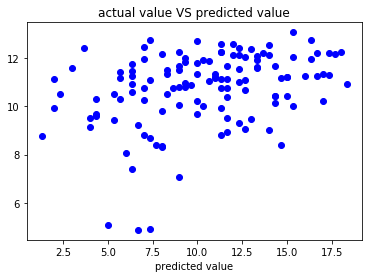

In [64]:
lrp=linear_prediction.toPandas()
plt.plot(lrp['mean_grade'],lrp['prediction'],'o',color='blue')
plt.title('actual value VS predicted value')
plt.xlabel('mean_grade')
plt.xlabel('predicted value')
plt.show()

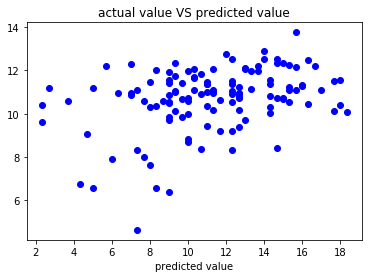

In [65]:
rfp=random_prediction.toPandas()
plt.plot(rfp['mean_grade'],rfp['prediction'],'o',color='blue')
plt.title('actual value VS predicted value')
plt.xlabel('mean_grade')
plt.xlabel('predicted value')
plt.show()